# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
#import MAGAN

/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-05-14 15:30:38.739493: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 15:30:38.905298: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 15:30:39.546188: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 15:30:42.014

In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
#tma.clear_directory()

#Converts old way of storing files to the new - if any
tma.change_old_files_to_new()

<><><><><><><><><><><><><><><><><><><><><><><>     Updates completed     <><><><><><><><><><><><><><><><><><><><><><><>


True

In [6]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="iris.csv", split = "distort", percent_of_anchors = [0.05], random_state=6739, verbose = 2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels)



 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (150, 4)
Split B Features shape (150, 4)
MDS initialized with 4 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

-------------------------------------   NAMA TESTS  /iris  -------------------------------------

Percent of Anchors 0.05


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


    FOSCTTM: 0.14542222222222223
    Cross Embedding: 0.8933333333333333


True

In [113]:
"""Testing All functions"""
class_instances = tma.run_all_tests(csv_files = ["iris.csv"], test_random = 1, #General function arguments
                                split = "random", verbose = 0, percent_of_anchors = [0.05, 0.1, 0.15, 0.2, 0.3], #Init Key arguments
                                run_DIG = False, page_ranks = ("None", "off-diagonal", "full"), predict = True, #DIG key arguments
                                run_DTA = False,
                                run_NAMA = False,
                                run_SSMA = False,
                                run_SPUD = True, operations = ("average", "abs"), kind = ["distance", "pure", "similarity"]) #SPUD key arguments | SPUDS_Algorithm


-------------------------------------    SPUD Tests iris   -------------------------------------

Operation average
    Kind distance
        <><><><><>    File /Users/user/Desktop/Work/ManifoldData/iris/SPUD(r1825)_Ope(average)_Kin(distance)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy already exists   <><><><><>
    Kind pure
        KNN 2
            Percent of Anchors 0.05
                FOSCTTM Score: 0.47653333333333325
                CE Score: 0.38666666666666666
            Percent of Anchors 0.1
                FOSCTTM Score: 0.3628888888888889
                CE Score: 0.7133333333333334
            Percent of Anchors 0.15
                FOSCTTM Score: 0.3322666666666667
                CE Score: 0.6666666666666666
            Percent of Anchors 0.2
                FOSCTTM Score: 0.30333333333333334
                CE Score: 0.6666666666666666
            Percent of Anchors 0.3
                FOSCTTM Score: 0.24191111111111108
                CE Score: 0.8666666666666667
        KNN

In [2]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

2024-05-14 14:25:16.101582: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:25:16.105842: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:25:16.158310: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 14:25:17.635081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-14 14:25:21.053476: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:25:21.058129: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will n

In [2]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN', 'Combined_Metric'],
      dtype='object')

In [3]:
df.sample(10)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
106705,hepatitis,DIG,8605,skewed,23.0,0.15,0.30,None,0.295782,NaN,NaN,0.250473,0.637681,0.387209
14268,breast_cancer,SPUD,1258,random,2.0,0.01,0.20,NaN,NaN,average,distance,0.333299,0.922747,0.589448
10193,breast_cancer,SPUD,1825,random,58.0,0.09,0.20,NaN,NaN,average,pure,0.288292,0.954220,0.665928
187512,glass,DIG,1825,random,37.0,0.15,0.20,off-diagonal,0.096273,NaN,NaN,0.273496,0.383178,0.109682
145735,seeds,SSMA,3879,random,14.0,0.07,0.20,NaN,NaN,NaN,NaN,0.327678,0.600840,0.273162
86449,hill_valley,DTA,8191,random,106.0,0.17,0.20,NaN,NaN,NaN,NaN,0.040511,0.547455,0.506945
178557,iris,SSMA,1825,skewed,30.0,0.15,0.30,NaN,NaN,NaN,NaN,0.269717,0.846154,0.576437
34949,balance_scale,SPUD,5668,random,119.0,0.19,0.20,NaN,NaN,abs,distance,0.774331,0.454400,-0.319931
191656,glass,SPUD,6974,skewed,2.0,0.01,0.15,NaN,NaN,abs,distance,0.350424,0.434579,0.084156
55755,heart_failure,SPUD,17,skewed,2.0,0.01,0.30,NaN,NaN,average,distance,0.383665,0.648829,0.265165


# Visualization Tests

In [74]:
import matplotlib.pyplot as plt
import numpy as np

def subset_df(**kwargs):
    """Each way we want to be subset should be as so 'csv_file' = "glass". It can take any column and any key
    
    Returns subseted Dataframe"""
    subset = df

    for key in kwargs:
        subset = subset[subset[key] == kwargs[key]]
    
    return subset

        
def plot_in_fig(columns, rows, **kwargs):
    """df should be the dataframe
    
    Columns should be a list of dictionaries that represent the key word arguments for plotting.
    rows should be a list of dictionaries that represent the how you want to subset the DF by
    """


    fig, axes = plt.subplots(len(rows), len(columns), figsize = (16, 10))

    #Plot everything in the graphs
    row_count = 0 

    for dictionary in rows:
        df = subset_df(**dictionary)
        column_count = 0
        for column in columns:
            df.plot(ax = axes[row_count, column_count], **column, **kwargs)

            #Add one to the next axis
            column_count += 1

        #Set the label
        axes[row_count, 0].set_ylabel(f"{dictionary}")

        #Add one to the next row
        row_count += 1

        
    #This gets rid of the annoying text
    plt.show()



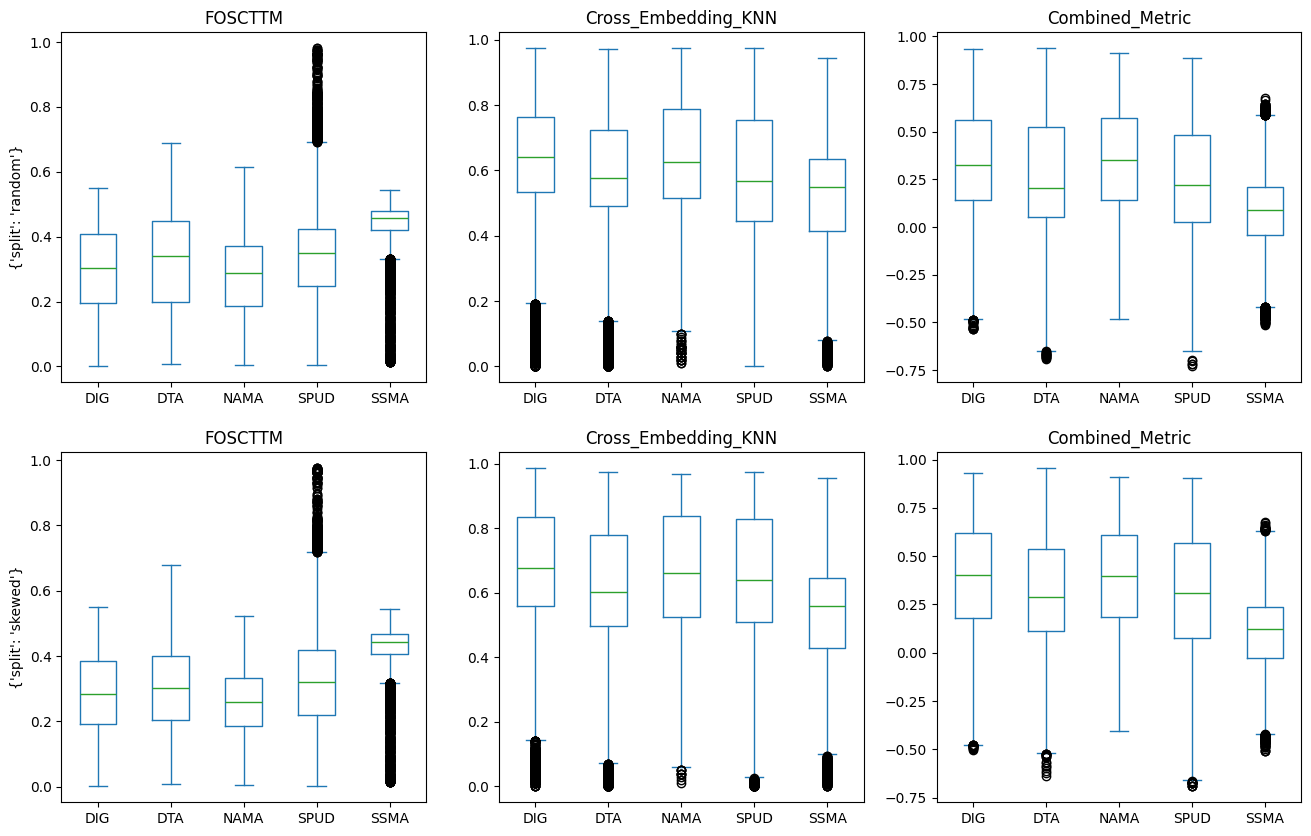

In [77]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

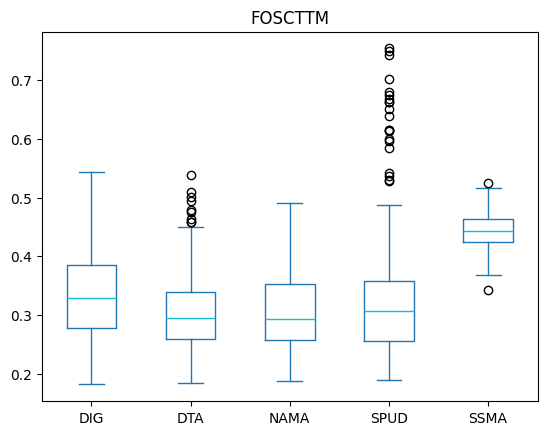

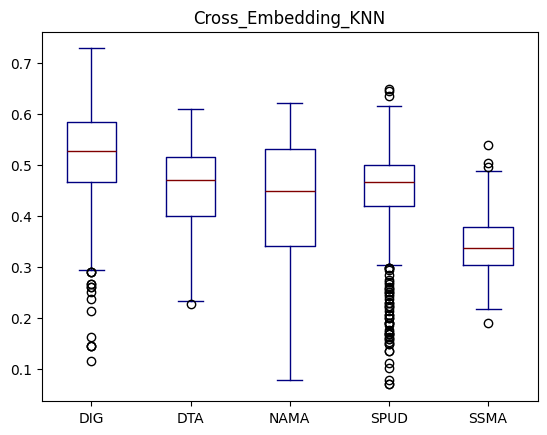

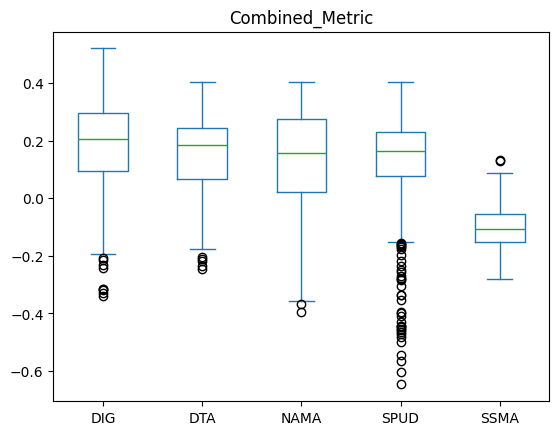

In [22]:
#If we want to see only a few csv files at a time, we can sub set it here
df_subset = subset_df(split = "skewed")

#To see all of it combined
#df_subet = df


"""Run the tests"""
df_subset.plot(column='FOSCTTM', by='method', kind = 'box', cmap='tab10' )
df_subset.plot(column='Cross_Embedding_KNN', by='method', kind = 'box', cmap = "jet")
df_subset.plot(column='Combined_Metric', by='method', kind = 'box')
#Line below is so we don't have the annoying text :)
plt.show()

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [7]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [8]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
101216,zoo,DIG,1825,skewed,5.0,0.03,0.05,full,0.333680,NaN,NaN,0.296147,0.029703,-0.266444
93136,hill_valley,DIG,1825,skewed,67.0,0.11,0.05,None,0.050700,NaN,NaN,0.005533,0.600660,0.595127
169103,titanic,DIG,7154,skewed,137.0,0.19,0.10,off-diagonal,0.215102,NaN,NaN,0.396610,0.778090,0.381480
198334,parkinsons,DIG,3211,random,22.0,0.11,0.05,None,0.107367,NaN,NaN,0.418698,0.753846,0.335148
197109,parkinsons,DIG,1819,random,10.0,0.05,0.05,None,0.111033,NaN,NaN,0.305510,0.748718,0.443208


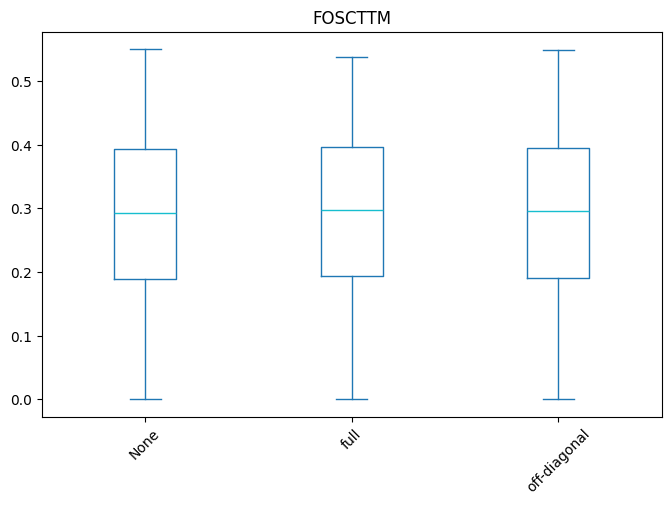

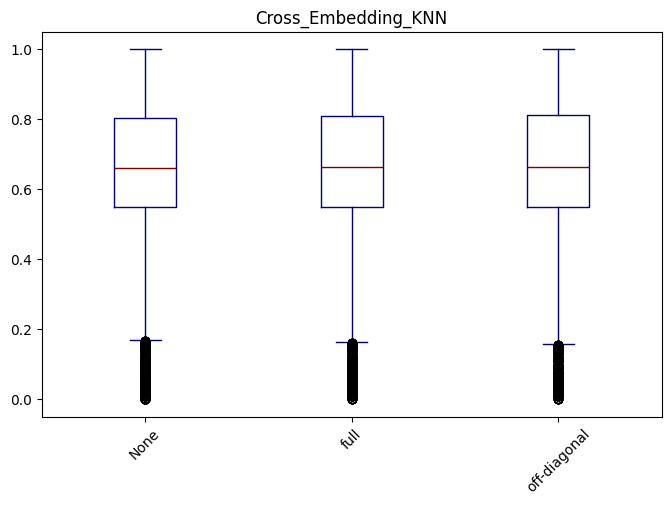

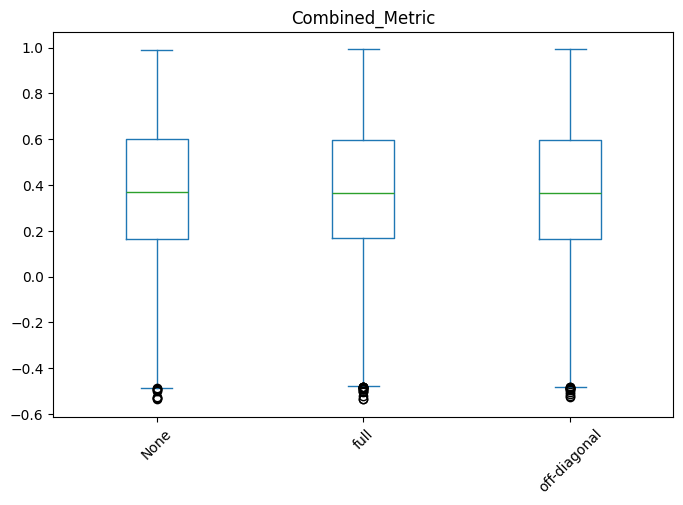

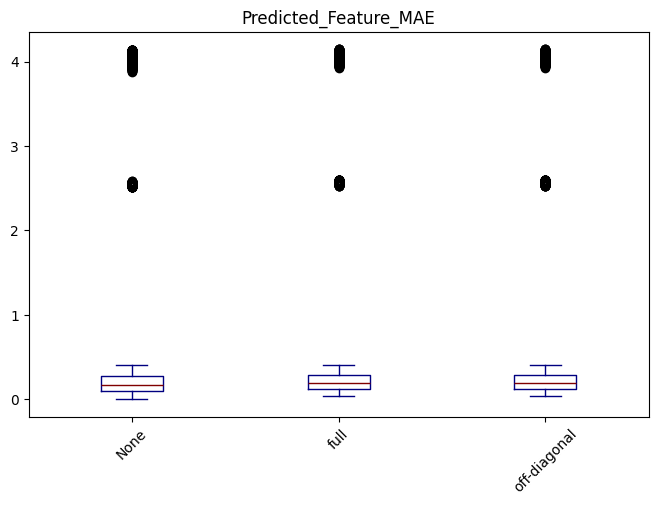

In [9]:
#To make it easier to add edits
key_words = {"figsize": (8, 5),
            "kind": "box",
            "by": "Page_Rank",
            "rot": 45}

df_subset2.plot(column='FOSCTTM', cmap='tab10', **key_words)
df_subset2.plot(column='Cross_Embedding_KNN', cmap = "jet", **key_words)
df_subset2.plot(column='Combined_Metric', **key_words)
df_subset2.plot(column='Predicted_Feature_MAE', cmap = "jet", **key_words)

plt.show()

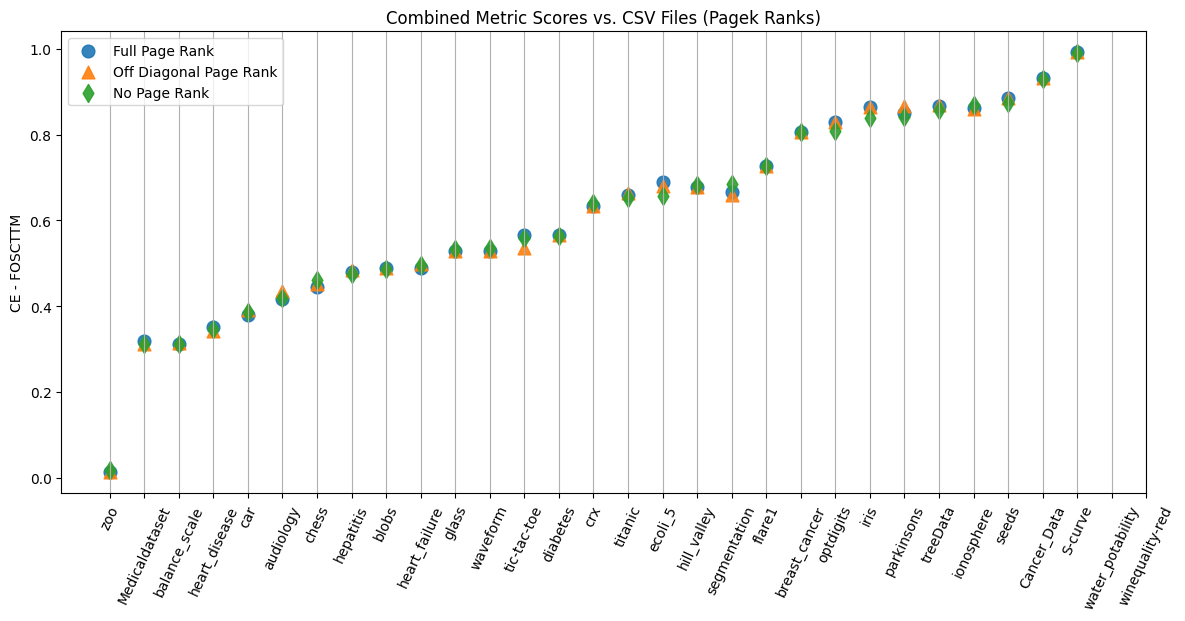

In [10]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance seems to be the best metric (This note was made when we only have iris data tested)

In [11]:
#If we want to see only a few csv files at a time, we can sub set it here
df_subset3 = df[df["csv_file"] == "hill_valley"]

#To see all of it combined
df_subet3 = df

#Change the method to DIG
df_subset3 = df_subset3[df_subset3["method"] == "SPUD"]

#Combine DIG argumenst
df_subset3["Combined_Arguments"] = df_subset3["Operation"]+ " and " + df_subset3["SPUDS_Algorithm"]

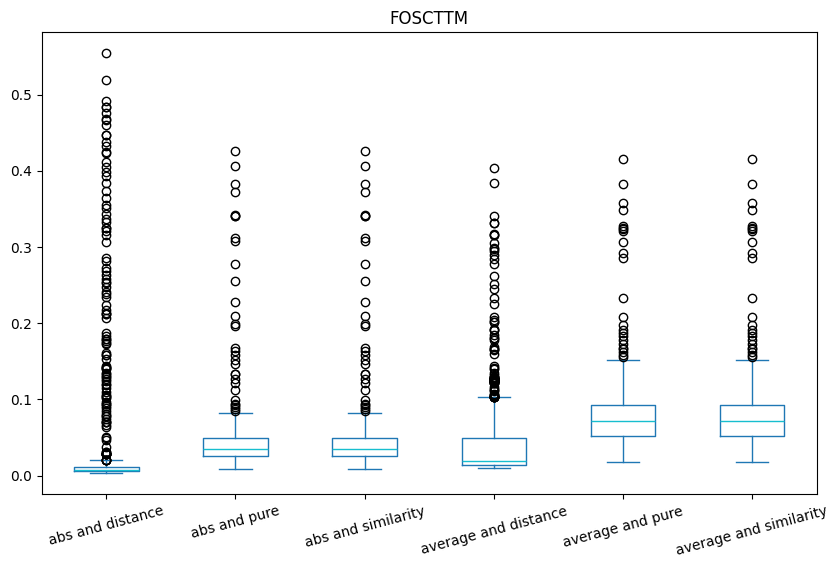

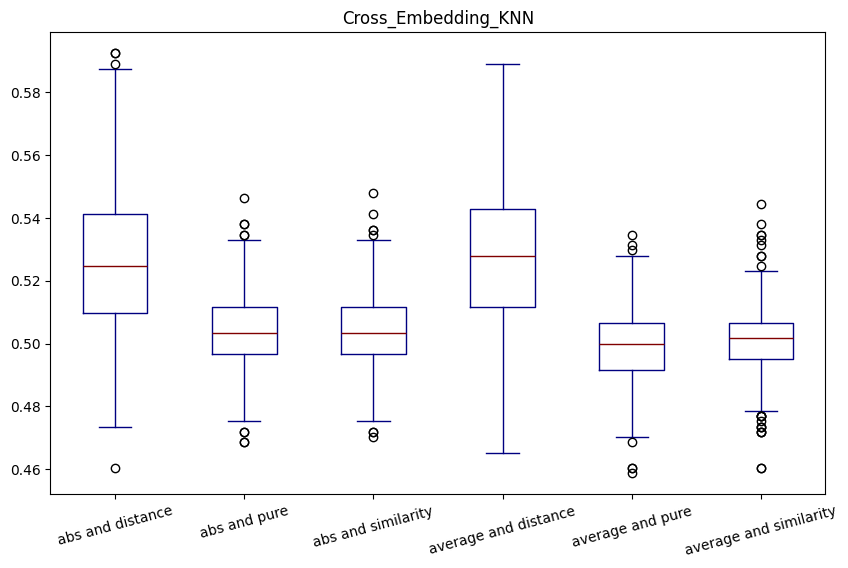

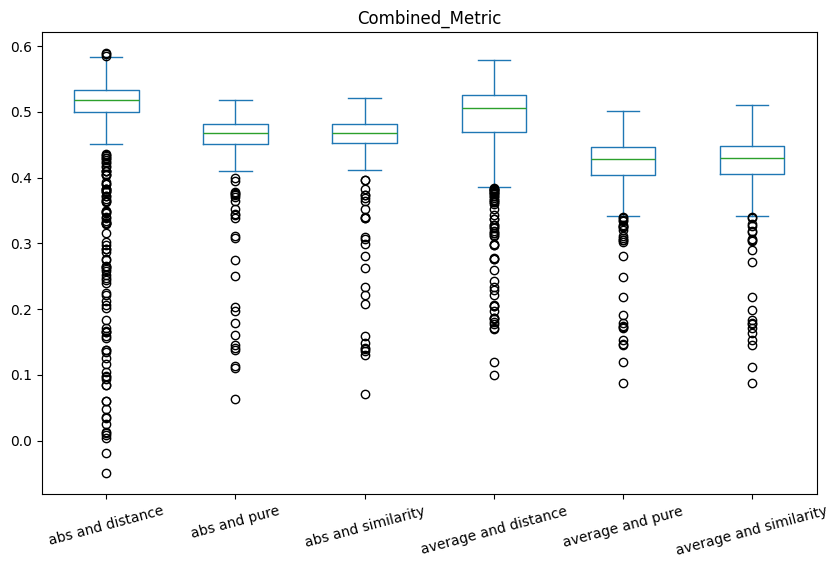

In [12]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

df_subset3.plot(column='FOSCTTM', cmap='tab10', **key_words)
df_subset3.plot(column='Cross_Embedding_KNN', cmap = "jet", **key_words)
df_subset3.plot(column='Combined_Metric', **key_words)

plt.show()

## Comparing Methods against CSV Files

In [13]:
def plt_methods_by_CSV(method = "max", sort_by = "SPUD"):
    """Method should be 'max', or "mean"
    
    sort_by should be the string of what the method you want"""
    if method == "max":
        agregate_df = pd.DataFrame({
            'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].max(),
            'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].max(),
            'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].max(),
            'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].max(),
            'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].max()
        })
    elif method == "mean":
        agregate_df = pd.DataFrame({
            'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].mean(),
            'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].mean(),
            'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].mean(),
            'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].mean(),
            'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].mean()
        })
    else:
        print("Method not understood. Please use max or mean")

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 84,
                "alpha" : .90}

    plt.figure(figsize=(14, 6))
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) #I'm back and forth on the helpfulness of the markers
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"], marker = 's', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
    plt.title(f"Combined Metric Scores vs. CSV Files ({method})")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

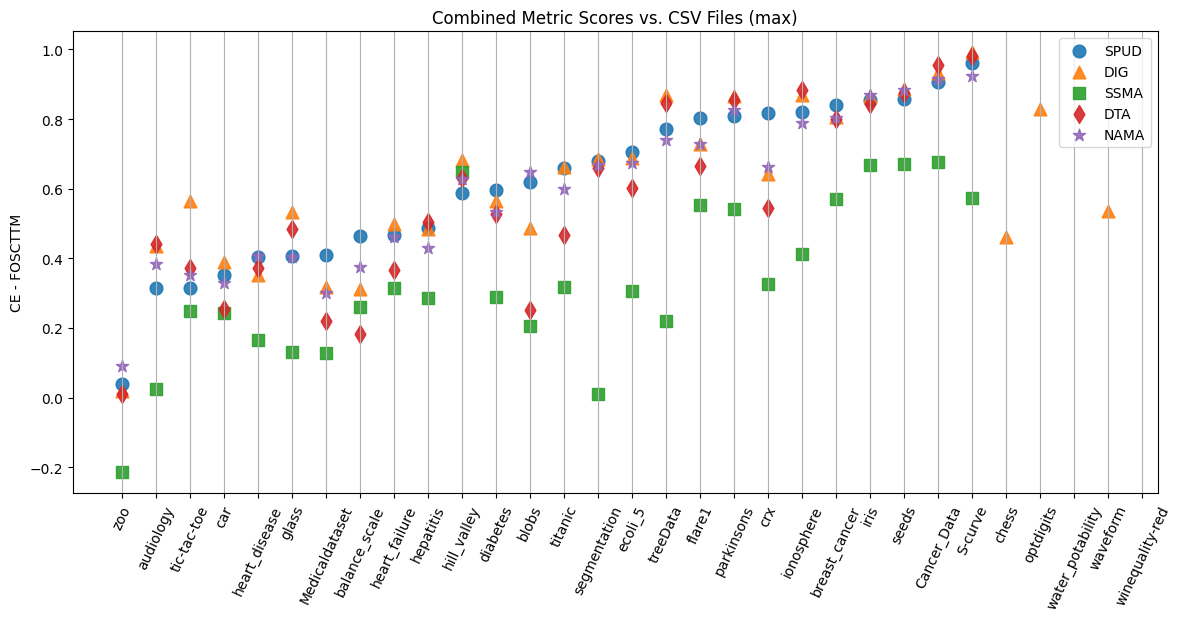

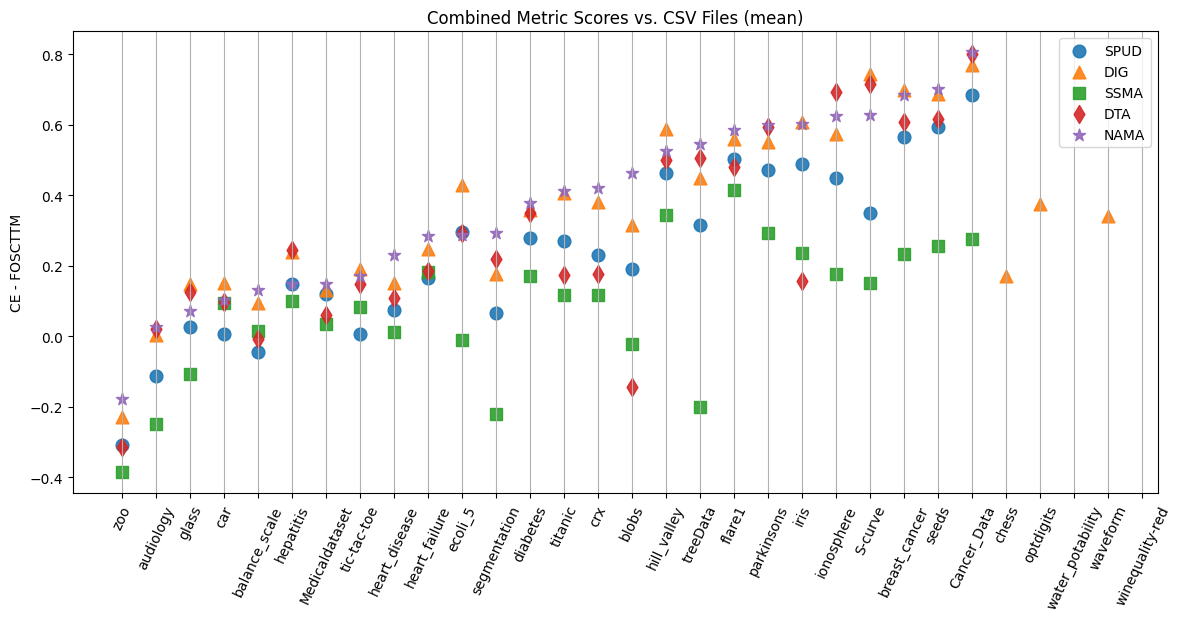

(None, None)

In [14]:
plt_methods_by_CSV(), plt_methods_by_CSV(method = "mean", sort_by="NAMA")

## Comparing Percent of anchors and KNN values

In [15]:
def line_plot_methods(subset = "None", argument = "Percent_of_Anchors"):
    "subset should equal none or the csv file name"

    #Subset the data
    if subset != "None":
        df_subset = df[df["csv_file"] == subset]
    else:
        df_subset = df
    
    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)["Combined_Metric"].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)["Combined_Metric"].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)["Combined_Metric"].mean(), label = "DIG")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)["Combined_Metric"].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel("Combined Metric Score (CE - FOSCTTM)")
    plt.legend()
    plt.title("Methods Together")



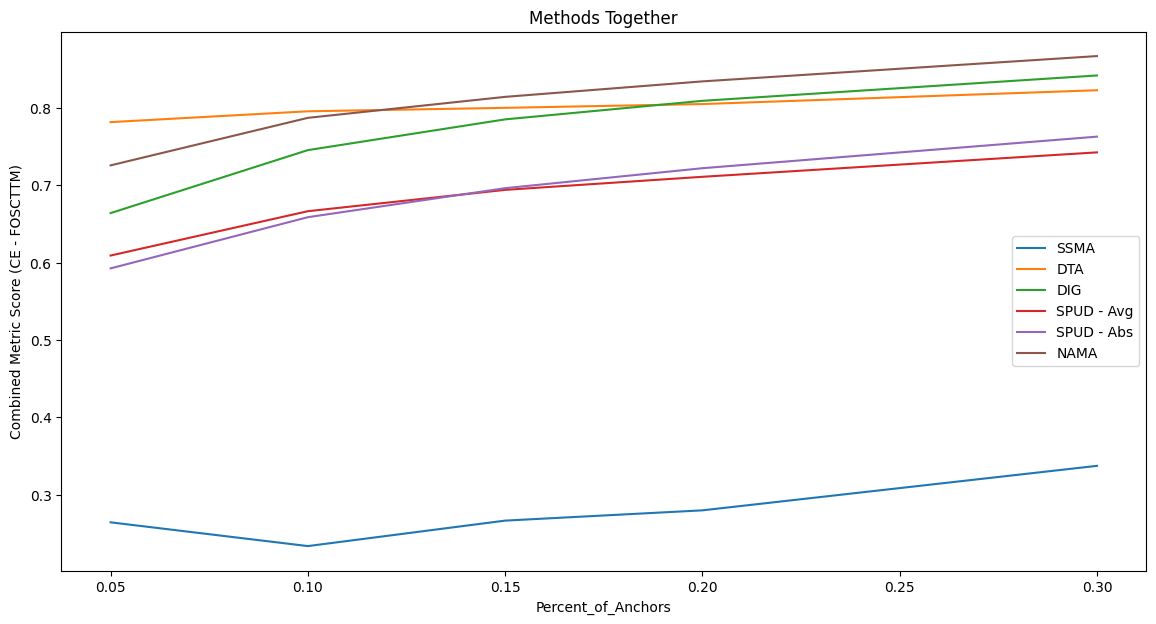

In [16]:
line_plot_methods(subset = "Cancer_Data")

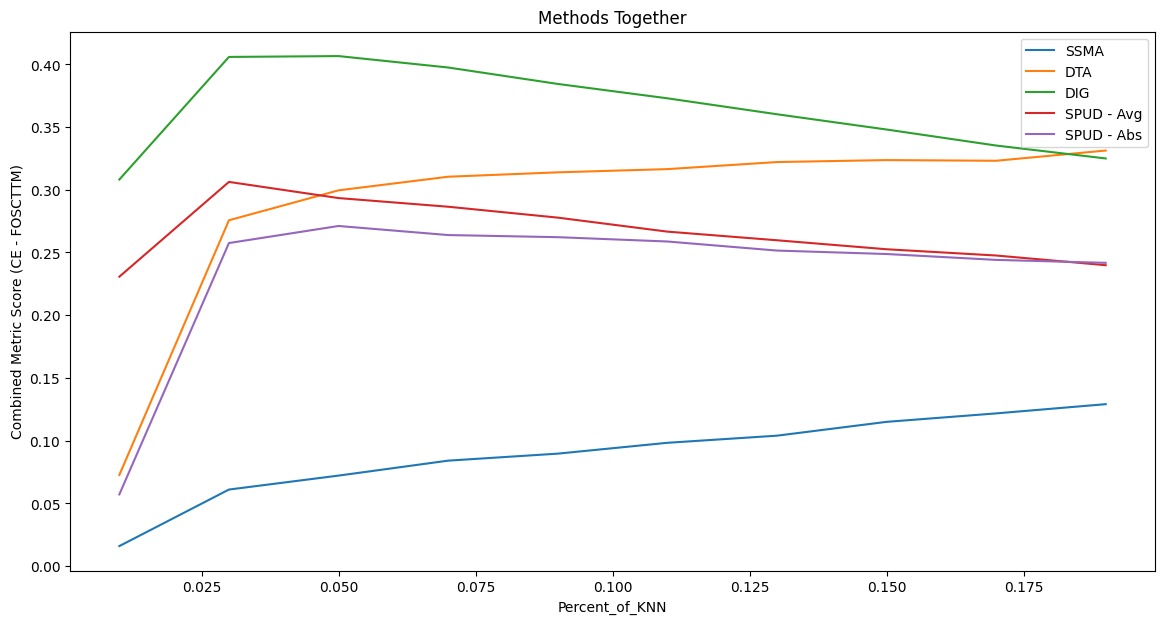

In [17]:
line_plot_methods(argument = "Percent_of_KNN")

## Plotting the Embeddings

In [18]:
visual_test = tma.test_manifold_algorithms(csv_file="glass.csv", split= "distort", percent_of_anchors= [0.1, 0.2], verbose=2)


 
 
---------------------------       Initalizing class with glass.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (214, 9)
Split B Features shape (214, 9)
MDS initialized with 9 components
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)


Percent of anchors used: 0.2
The amount of Nearest Neighbors: 17


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:747: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


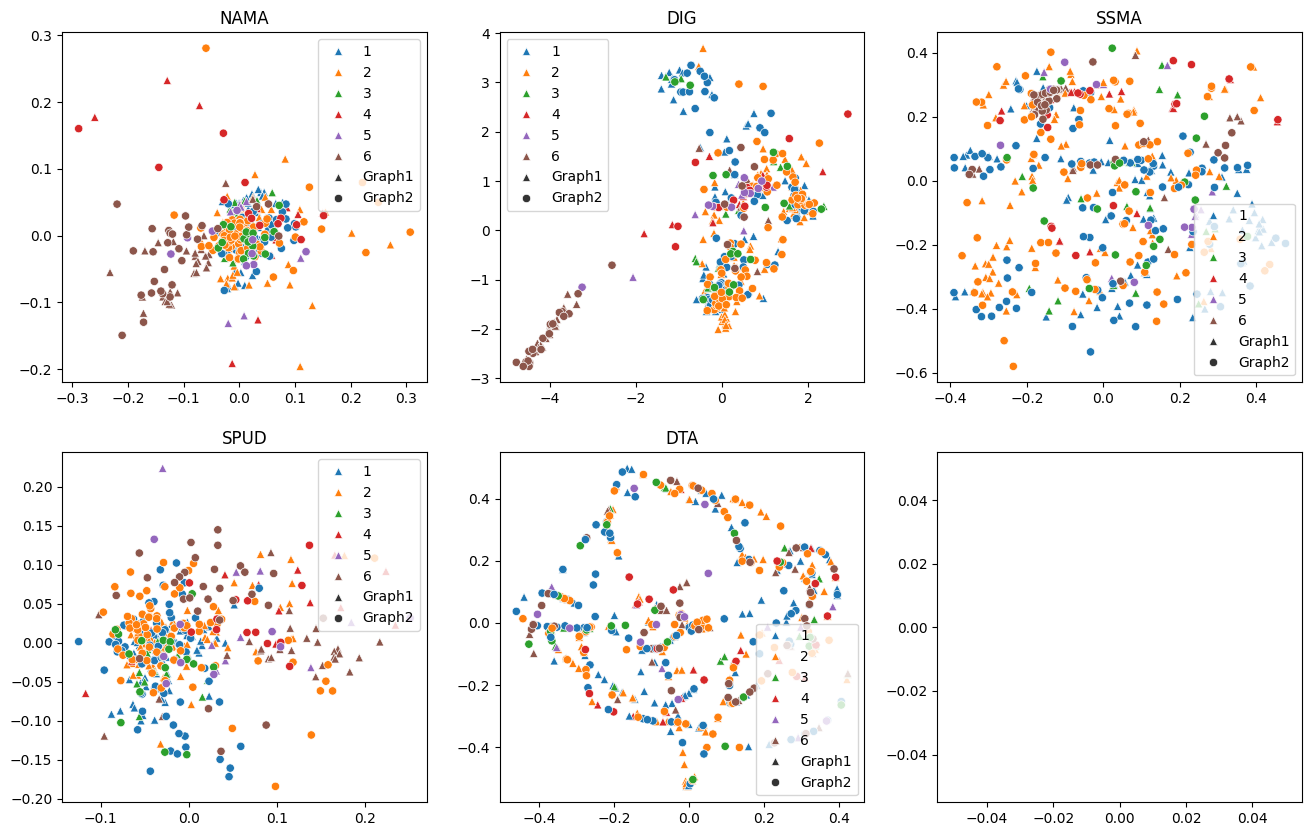

In [19]:
visual_test.plot_embeddings()

# Debugging Tests Below